# Loading Image Data

In [1]:
%matplotlib inline

When you load in the data with ImageFolder, you'll need to define some transforms.

In [6]:
from torchvision import datasets
from torchvision import transforms, utils
import torch
import helper

import matplotlib.pyplot as plt

data_dir = 'C:/Users/Emrah Sariboz/Desktop/Udacity DeepLarning/Cat_Dog_data/train'

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])


dataset = datasets.ImageFolder(data_dir,transform=transform)


dataloader = torch.utils.data.DataLoader(dataset, batch_size = 32, shuffle = True)

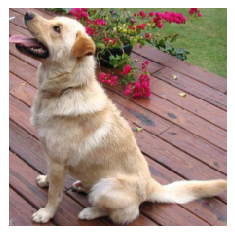

In [3]:
#Test
images, label = next(iter(dataloader))
helper.imshow(images[0], normalize =False)

**Data Augmentation**

A common strategy in NN is to introduce randomness to the training_data which will help the network to generalize with same images but in different locations. It can be done by randomly rotatin, mirror, scale etc. This process is called **Data Augmentation**. This proces needs to implemented only on training images because we need the testing images to be same as validation images. 

In [4]:
data_dir = 'C:/Users/Emrah Sariboz/Desktop/Udacity DeepLarning/Cat_Dog_data/'


train_transform =  transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                transforms.ToTensor()])

test_transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])

train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transform)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transform)


train_loader = torch.utils.data.DataLoader(train_data, batch_size=32)
test_loader = torch.utils.data.DataLoader(test_data, batch_size= 32)

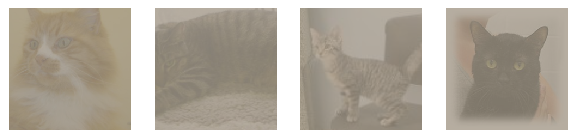

In [8]:
data_iter = iter(test_loader)

images, labels = next(data_iter)

fig, axes = plt.subplots(figsize=(10,4), ncols = 4)

for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax= ax)
    


In [9]:
from torch import nn